# Основные понятия машинного обучения

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* https://contrib.scikit-learn.org/category_encoders/
* https://scikit-learn.org/stable/modules/model_evaluation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

## Задачи для совместного разбора

1\. Загрузите набор данных из файла `possum.csv` в виде `pd.DataFrame`. Решите задачу классификации по столбцу `sex`.

In [15]:
#!pip install category_encoders

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv('data\possum.csv').drop(columns=['case']).fillna(0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
df.Pop.value_counts()

other    58
Vic      46
Name: Pop, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["sex"]),
    df["sex"],
    train_size=0.8,
    random_state=42
)

In [17]:
pop = X_train["Pop"]
tr = ce.OrdinalEncoder().fit(pop) # labelencoder но начало с 1

In [23]:
tr = ColumnTransformer(
    [
        ("Pop", ce.OrdinalEncoder(), ["Pop"]),
        ("site", OneHotEncoder(), ["site"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [24]:
X_train_t = tr.transform(X_train)
X_test_t = tr.transform(X_test)

In [25]:
y_train_t = y_train.map({'m':0, 'f':1})
y_test_t = y_test.map({'m':0, 'f':1})

In [27]:
model = RandomForestClassifier().fit(X_train_t, y_train_t)

In [28]:
model.score(X_train_t, y_train_t), model.score(X_test_t, y_test_t)

(1.0, 0.7619047619047619)

2\. Проверьте качество обучения модели с использованием перекрестной проверки

In [29]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(
    RandomForestClassifier(random_state=42),
    X_train_t,
    y_train_t,
    cv=5
)

array([0.76470588, 0.41176471, 0.52941176, 0.5       , 0.625     ])

3\. Найдите оптимальные гиперпараметры модели, используя поиск по сетке.

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        "n_estimators":[50, 100, 150, 200], 
        "max_depth":[None, 1, 2, 3]
    }
).fit(X_train_t, y_train_t)

In [36]:
grid.best_score_, grid.best_params_

(0.6014705882352941, {'max_depth': 3, 'n_estimators': 150})

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv` в виде `pd.DataFrame`. Преобразуйте столбец `Temperature` в числовой. Преобразуйте столбец `IsHoliday` в числовой столбец, содержащий значения 0 и 1, предварительно проанализировав значения в этом столбце.

In [275]:
import pandas as pd
import re

In [276]:
df = pd.read_csv("data\Walmart.csv")
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.90,42.31°C,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0
1,12-02-2010,1641957.44,38.51°C,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,Y
2,19-02-2010,1611968.17,39.93°C,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,N
3,26-02-2010,1409727.59,46.63°C,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,n
4,05-03-2010,1554806.68,46.5°C,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0


In [277]:
df['IsHoliday'].value_counts()

n      1023
0      1008
-      1006
no      988
N       981
No      979
y       101
yes      95
Yes      88
1        84
Y        82
Name: IsHoliday, dtype: int64

In [278]:
df['IsHoliday'] = df['IsHoliday'].map(
    {'n':0, '-':0, 'no':0, 'N':0, 'No':0, 'y':1, 'yes':1, 'Yes':1, 'Y':1, '0':0, '1':1}
)

In [279]:
df['IsHoliday'].value_counts()

0    5985
1     450
Name: IsHoliday, dtype: int64

In [280]:
df["Temperature"] = df["Temperature"].apply(lambda x: re.findall(r'\d+.?\d+', x)[0]).apply(float)

In [281]:
df.head(1)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday
0,05-02-2010,1643690.9,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0


<p class="task" id="2"></p>

2\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 для решения задачи регрессии. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer

In [283]:
df['Day'] = df['Date'].apply(lambda x: x.split('-')[0]).apply(int)
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1]).apply(int)
df['Year'] = df['Date'].apply(lambda x: x.split('-')[2]).apply(int)
df.drop(columns=['Date'], inplace=True)

In [189]:
df.head(1)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday,Day,Month,Year
0,1643690.9,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0,5,2,2010


In [190]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Weekly_Sales"]),
    df["Weekly_Sales"],
    train_size=0.7,
    random_state=42
)

In [191]:
tr1 = ColumnTransformer(
    [
        ("StoreId", ce.OrdinalEncoder(), ["StoreId"]),
        ("Days", "passthrough", ["Day", "Month", "Year", "IsHoliday"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [192]:
X_train_t1 = tr1.transform(X_train)
X_test_t1 = tr1.transform(X_test)

In [193]:
tr2 = ColumnTransformer(
    [
        ("StoreId", OneHotEncoder(), ["StoreId"]),
        ("Days", "passthrough", ["Day", "Month", "Year", "IsHoliday"])
    ],
    remainder=StandardScaler()
).fit(X_train)

In [194]:
X_train_t2 = tr2.transform(X_train)
X_test_t2 = tr2.transform(X_test)

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Weekly_Sales` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных регрессионных метрик (MAE, MSE, RMSE, MAPE). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам). Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.   

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE

In [196]:
X = [(X_train_t1, X_test_t1), (X_train_t2, X_test_t2)]
models = [LinearRegression(), RandomForestRegressor()]
metrics = []

In [197]:
for model in models:
    for x in X:
        metric = []
        model.fit(x[0], y_train)
        y_pred_train = model.predict(x[0])
        y_pred_test = model.predict(x[1])
        metric.extend([MAE(y_train, y_pred_train),
                       MAE(y_test, y_pred_test),
                       MSE(y_train, y_pred_train),
                       MSE(y_test, y_pred_test),
                       MSE(y_train, y_pred_train, squared=False),
                       MSE(y_test, y_pred_test, squared=False),
                       MAPE(y_train, y_pred_train),
                       MAPE(y_test, y_pred_test)])
        metrics.append(metric)

In [198]:
import pandas as pd
mframe = pd.DataFrame(metrics,
    index=[['LinearRegression', 'LinearRegression', 'RandomForestRegressor', 'RandomForestRegressor'],
          ['X_train_t1', 'X_train_t2', 'X_train_t1', 'X_train_t2']],
    columns=[
        ['MAE', 'MAE', 'MSE', 'MSE', 'RMSE', 'RMSE', 'MAPE', 'MAPE'],
        ['train', 'test'] * 4
    ]
    )
mframe

MAE                          MSE  \
                                          train           test         train   
LinearRegression      X_train_t1  462770.309739  467909.677855  3.040253e+11   
                      X_train_t2   93263.827904   98128.084405  2.245811e+10   
RandomForestRegressor X_train_t1   22520.746558   61112.788943  2.171526e+09   
                      X_train_t2   22113.800452   60030.834529  2.201345e+09   

                                                         RMSE                 \
                                          test          train           test   
LinearRegression      X_train_t1  3.088309e+11  551384.852734  555725.530731   
                      X_train_t2  2.490010e+10  149860.311061  157797.664590   
RandomForestRegressor X_train_t1  1.491134e+10   46599.635275  122112.006204   
                      X_train_t2  1.540898e+10   46918.495209  124132.893065   

                                      MAPE            
                                     train      test  
LinearRegression      X_train_t1  0.653379  0.658923  
                      X_train_t2  0.097770  0.101556  
RandomForestRegressor X_train_t1  0.020329  0.052966  
                      X_train_t2  0.019537  0.051383

In [199]:
mframe.sort_values([('RMSE', 'test')], ascending=False)

MAE                          MSE  \
                                          train           test         train   
LinearRegression      X_train_t1  462770.309739  467909.677855  3.040253e+11   
                      X_train_t2   93263.827904   98128.084405  2.245811e+10   
RandomForestRegressor X_train_t2   22113.800452   60030.834529  2.201345e+09   
                      X_train_t1   22520.746558   61112.788943  2.171526e+09   

                                                         RMSE                 \
                                          test          train           test   
LinearRegression      X_train_t1  3.088309e+11  551384.852734  555725.530731   
                      X_train_t2  2.490010e+10  149860.311061  157797.664590   
RandomForestRegressor X_train_t2  1.540898e+10   46918.495209  124132.893065   
                      X_train_t1  1.491134e+10   46599.635275  122112.006204   

                                      MAPE            
                                     train      test  
LinearRegression      X_train_t1  0.653379  0.658923  
                      X_train_t2  0.097770  0.101556  
RandomForestRegressor X_train_t2  0.019537  0.051383  
                      X_train_t1  0.020329  0.052966

<p class="task" id="4"></p>

4\. Повторите решение задачи 3, используя перекрестную проверку для оценки качества модели на обучающем множестве. При представлении результата в виде таблицы значения метрик указывайте в виде строки "среднее±ст.откл."

In [106]:
from sklearn.model_selection import cross_val_score

In [111]:
X = [X_train_t1, X_train_t2]
models = [LinearRegression(), RandomForestRegressor()]
metrics = ['neg_mean_absolute_error',
           'neg_mean_squared_error',
           'neg_root_mean_squared_error',
           'neg_mean_absolute_percentage_error']
res = []

for model in models:
    for x in X:
        metric = []
        for m in metrics:
            cv = cross_val_score(model,                 
                                 x,                      
                                 y_train,                      
                                 cv = 3,                
                                 scoring = m)
            metric.append(f'{cv.mean().round(4)}±{cv.std().round(4)}')
        res.append(metric)

In [125]:
res_ = [res[0] + res[2], res[1] + res[3]]

In [124]:
mframe = pd.DataFrame(res_,
    index=['LinearRegression', 'RandomForestRegressor'],
    columns=[
        ['X_train_t1'] * 4 + ['X_train_t2'] * 4,
        ['MAE', 'MSE', 'RMSE', 'MAPE', 'MAE', 'MSE', 'RMSE', 'MAPE']
    ]
    )
mframe

X_train_t1  \
                                          MAE   
LinearRegression       -463651.7242±1655.4651   
RandomForestRegressor    -95372.2902±243.8322   

                                                           \
                                                      MSE   
LinearRegression       -305093837287.8432±9410371665.2448   
RandomForestRegressor   -23411568487.9386±2186103890.0637   

                                                               \
                                         RMSE            MAPE   
LinearRegression       -552287.1735±8527.3283  -0.6545±0.0076   
RandomForestRegressor  -152841.4431±7145.7503  -0.0999±0.0003   

                                  X_train_t2  \
                                         MAE   
LinearRegression       -65778.2035±1206.0433   
RandomForestRegressor    -64581.6995±790.752   

                                                          \
                                                     MSE   
LinearRegression       -16994744880.4948±2210736558.8157   
RandomForestRegressor  -17851907673.2349±2370047732.5909   

                                                               
                                         RMSE            MAPE  
LinearRegression       -130195.7721±8549.4501  -0.0596±0.0007  
RandomForestRegressor  -133887.0471±8318.5739  -0.0571±0.0019

<p class="task" id="5"></p>

5\. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70 на 30 с сохранением распределения столбца `IsHoliday` для решения задачи классификации. Создайте несколько версий обучающей и тестовой выборки выбрав различные алгоритмы препроцессинга данных: кодирования нечисловой информации, масшабирования признаков и т.д. Обратите внимание, что все энкодеры должны настраиваться только на основе обучающей выборки, расчет статистик для масштабирования должен проводиться только на основе обучающей выборки и т.д.

In [141]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,StoreId,IsHoliday,Day,Month,Year
0,1643690.90,42.31,2.572,211.096358,8.106,c4ca4238a0b923820dcc509a6f75849b,0,5,2,2010
1,1641957.44,38.51,2.548,211.242170,8.106,c4ca4238a0b923820dcc509a6f75849b,1,12,2,2010
2,1611968.17,39.93,2.514,211.289143,8.106,c4ca4238a0b923820dcc509a6f75849b,0,19,2,2010
3,1409727.59,46.63,2.561,211.319643,8.106,c4ca4238a0b923820dcc509a6f75849b,0,26,2,2010
4,1554806.68,46.50,2.625,211.350143,8.106,c4ca4238a0b923820dcc509a6f75849b,0,5,3,2010


In [284]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["IsHoliday"]),
    df["IsHoliday"],
    train_size=0.7,
    random_state=42
)

In [285]:
tr1 = ColumnTransformer(
    [
        ("StoreId", ce.OrdinalEncoder(), ["StoreId"]),
        ("Days", "passthrough", ["Day", "Month", "Year"])
    ],
    remainder=MinMaxScaler()
).fit(X_train)

In [286]:
X_train_t1 = tr1.transform(X_train)
X_test_t1 = tr1.transform(X_test)

In [287]:
tr2 = ColumnTransformer(
    [
        ("StoreId", OneHotEncoder(), ["StoreId"]),
        ("Days", "passthrough", ["Day", "Month", "Year"])
    ],
    remainder=StandardScaler()
).fit(X_train)

In [288]:
X_train_t2 = tr2.transform(X_train)
X_test_t2 = tr2.transform(X_test)

<p class="task" id="6"></p>

6\. Решите задачу предсказания столбца `IsHoliday` с использованием пакета `sklearn`. Продемонстрируйте несколько различных моделей и значения основных метрик классификации (Accuracy, Precision, Recall, F1, AUC ROC). Представьте результат в виде таблицы, где по строкам расположены различные модели (дайте моделям названия и укажите их в качестве индекса), а по столбцам расположены версии датасетов и метрики на обучающем и тестовом множестве (двойной индекс по колонкам).  Отсортируйте таблицу по убыванию значений любой выбранной вами метрики на тестовом множестве.     

In [289]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [213]:
X = [(X_train_t1, X_test_t1), (X_train_t2, X_test_t2)]
models = [LogisticRegression(), RandomForestClassifier()]
metrics = []

for model in models:
    for x in X:
        metric = []
        model.fit(x[0], y_train)
        y_pred_train = model.predict(x[0])
        y_pred_test = model.predict(x[1])
        metric.extend([accuracy_score(y_train, y_pred_train),
                       accuracy_score(y_test, y_pred_test),
                       precision_score(y_train, y_pred_train),
                       precision_score(y_test, y_pred_test),
                       recall_score(y_train, y_pred_train),
                       recall_score(y_test, y_pred_test),
                       f1_score(y_train, y_pred_train),
                       f1_score(y_test, y_pred_test),
                       roc_auc_score(y_train, y_pred_train),
                       roc_auc_score(y_test, y_pred_test)])
        metrics.append(metric)

In [209]:
import pandas as pd
mframe = pd.DataFrame(metrics,
    index=[['LogisticRegression', 'LogisticRegression', 'RandomForestClassifier', 'RandomForestClassifier'],
          ['X_train_t1', 'X_train_t2', 'X_train_t1', 'X_train_t2']],
    columns=[
        ['Accuracy', 'Accuracy', 'Precision', 'Precision', 'Recall', 'Recall', 'f1', 'f1', 'roc_auc', 'roc_auc'],
        ['train', 'test'] * 5
    ]
    )
mframe

Accuracy           Precision       \
                                      train      test     train test   
LogisticRegression     X_train_t1  0.931394  0.926981       0.0  0.0   
                       X_train_t2  0.931616  0.925945       1.0  0.0   
RandomForestClassifier X_train_t1  1.000000  1.000000       1.0  1.0   
                       X_train_t2  1.000000  0.989125       1.0  1.0   

                                     Recall                  f1           \
                                      train      test     train     test   
LogisticRegression     X_train_t1  0.000000  0.000000  0.000000  0.00000   
                       X_train_t2  0.003236  0.000000  0.006452  0.00000   
RandomForestClassifier X_train_t1  1.000000  1.000000  1.000000  1.00000   
                       X_train_t2  1.000000  0.851064  1.000000  0.91954   

                                    roc_auc            
                                      train      test  
LogisticRegression     X_train_t1  0.500000  0.500000  
                       X_train_t2  0.501618  0.499441  
RandomForestClassifier X_train_t1  1.000000  1.000000  
                       X_train_t2  1.000000  0.925532

In [211]:
mframe.sort_values([('roc_auc', 'test')], ascending=False)

Accuracy           Precision       \
                                      train      test     train test   
RandomForestClassifier X_train_t1  1.000000  1.000000       1.0  1.0   
                       X_train_t2  1.000000  0.989125       1.0  1.0   
LogisticRegression     X_train_t1  0.931394  0.926981       0.0  0.0   
                       X_train_t2  0.931616  0.925945       1.0  0.0   

                                     Recall                  f1           \
                                      train      test     train     test   
RandomForestClassifier X_train_t1  1.000000  1.000000  1.000000  1.00000   
                       X_train_t2  1.000000  0.851064  1.000000  0.91954   
LogisticRegression     X_train_t1  0.000000  0.000000  0.000000  0.00000   
                       X_train_t2  0.003236  0.000000  0.006452  0.00000   

                                    roc_auc            
                                      train      test  
RandomForestClassifier X_train_t1  1.000000  1.000000  
                       X_train_t2  1.000000  0.925532  
LogisticRegression     X_train_t1  0.500000  0.500000  
                       X_train_t2  0.501618  0.499441

<p class="task" id="7"></p>

7\. Повторите задачу 6, используя поиск по сетке гиперпараметров для улучшения метрик моделей. При представлении результата в виде таблицы значения в столбце с названием модели укажите наилучшие гиперпараметры в виде "LogisticRegression(C=1, class_weight=None)"

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
grid = [
    GridSearchCV(
        LogisticRegression(),
        param_grid={
            'solver': ['linear', 'liblinear', 'newton-cg'],
            'C': np.logspace(0, 4, 10)
        }
    ).fit(X_train_t1, y_train),
    GridSearchCV(
        LogisticRegression(),
        param_grid={
            'solver': ['linear', 'liblinear', 'newton-cg'],
            'C': np.logspace(0, 4, 10)
        }
    ).fit(X_train_t2, y_train),
    GridSearchCV(
        RandomForestClassifier(),
        param_grid={
            'n_estimators': [100, 150],
            'max_depth': [2, 3, 4]
        }
    ).fit(X_train_t1, y_train),
    GridSearchCV(
        RandomForestClassifier(),
        param_grid={
            'n_estimators': [100, 150],
            'max_depth': [2, 3, 4]
        }
    ).fit(X_train_t2, y_train)
]

In [290]:
LR1 = LogisticRegression(**grid[0].best_params_, random_state=42).fit(X_train_t1, y_train)
LR2 = LogisticRegression(**grid[1].best_params_, random_state=42).fit(X_train_t2, y_train)
RFC1 = RandomForestClassifier(**grid[2].best_params_).fit(X_train_t1, y_train)
RFC2 = RandomForestClassifier(**grid[3].best_params_).fit(X_train_t2, y_train)

In [291]:
res = []
y_pred = [
    LR1.predict(X_train_t1),
    LR2.predict(X_train_t2),
    RFC1.predict(X_train_t1),
    RFC2.predict(X_train_t2)
]

y_pred_test = [
    LR1.predict(X_test_t1),
    LR2.predict(X_test_t2),
    RFC1.predict(X_test_t1),
    RFC2.predict(X_test_t2)
]

for preds in zip(y_pred, y_pred_test):
    res.append([
        accuracy_score(y_train, preds[0]),
        accuracy_score(y_test, preds[1]),
        precision_score(y_train, preds[0]),
        precision_score(y_test, preds[1]),
        recall_score(y_train, preds[0]),
        recall_score(y_test, preds[1]),
        f1_score(y_train, preds[0]),
        f1_score(y_test, preds[1]),
        roc_auc_score(y_train, preds[0]),
        roc_auc_score(y_test, preds[1])
    ])

In [227]:
mframe = pd.DataFrame(
    res,
    index=[[f'LogisticRegression {grid[0].best_params_}',
            f'LogisticRegression {grid[1].best_params_}',
            f'RandomForestClassifier {grid[2].best_params_}',
            f'RandomForestClassifier {grid[3].best_params_}'], 
           ['X_train_t1','X_train_t2', 'X_train_t1','X_train_t2']],
    columns=[['Accuracy', 'Accuracy', 'Precision', 'Precision', 'Recall', 'Recall', 'F1', 'F1', 'AUC ROC', 'AUC ROC'],
             ['train', 'test'] * 5]
)
mframe

Accuracy  \
                                                                  train   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.931394   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.931394   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.948490   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.931394   

                                                                         \
                                                                   test   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.926981   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.926981   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.946660   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.926981   

                                                              Precision       \
                                                                  train test   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1       0.0  0.0   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2       0.0  0.0   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1       1.0  1.0   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2       0.0  0.0   

                                                                 Recall  \
                                                                  train   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.249191   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                         \
                                                                   test   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.269504   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                     F1  \
                                                                  train   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.398964   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                         \
                                                                   test   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.424581   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                AUC ROC  \
                                                                  train   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.500000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.500000   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.624595   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.500000   

                                                                         
                                                                   test  
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.500000  
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.500000  
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.634752  
RandomForestClassifier {'max_depth': 2, 'n_esti... X_tr

In [229]:
mframe.sort_values([('F1', 'test')], ascending=False)

Accuracy  \
                                                                  train   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.948490   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.931394   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.931394   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.931394   

                                                                         \
                                                                   test   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.946660   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.926981   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.926981   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.926981   

                                                              Precision       \
                                                                  train test   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1       1.0  1.0   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1       0.0  0.0   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2       0.0  0.0   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2       0.0  0.0   

                                                                 Recall  \
                                                                  train   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.249191   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                         \
                                                                   test   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.269504   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                     F1  \
                                                                  train   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.398964   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                         \
                                                                   test   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.424581   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.000000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.000000   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.000000   

                                                                AUC ROC  \
                                                                  train   
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.624595   
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.500000   
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.500000   
RandomForestClassifier {'max_depth': 2, 'n_esti... X_train_t2  0.500000   

                                                                         
                                                                   test  
RandomForestClassifier {'max_depth': 4, 'n_esti... X_train_t1  0.634752  
LogisticRegression {'C': 2.7825594022071245, 's... X_train_t1  0.500000  
LogisticRegression {'C': 59.94842503189409, 'so... X_train_t2  0.500000  
RandomForestClassifier {'max_depth': 2, 'n_esti... X_tr

<p class="task" id="8"></p>

8\. Постройте ROC-кривые для всех обученных в задаче 7 моделей. Изобразите их на одной плоскости, добавьте подписи осей и легенду.

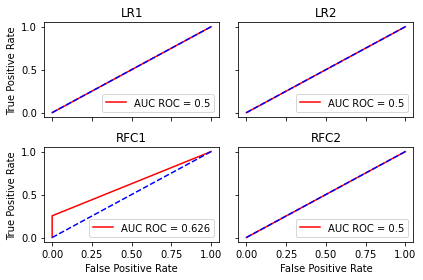

In [292]:
from matplotlib import pyplot as plt

fig, axis = plt.subplots(2, 2, sharex=True, sharey=True)
titles = ['LR1', 'LR2', 'RFC1', 'RFC2']
k = 0
for i in range(2):
    for j in range(2):
        fpr, tpr, thresholds = roc_curve(y_train, y_pred[k])
        axis[i][j].plot(fpr, tpr, color='red', label=f'AUC ROC = {round(auc(fpr, tpr), 3)}')
        axis[i][j].plot([0, 1], [0, 1], color='blue', linestyle='--')
        axis[i][j].set(title=titles[k], xlabel='False Positive Rate', ylabel='True Positive Rate')
        axis[i][j].legend(loc='lower right')
        k += 1
        
for ax in axis.flat:
    ax.label_outer()

fig.tight_layout()
plt.show()

<p class="task" id="9"></p>

9\. Используя любую из обученных моделей, сделайте предсказания столбца `IsHoliday` для тестового множества и сохраните результат в виде csv файла следующего вида:

```
id,isHoliday
1,0
2,1
...
```

In [306]:
import numpy as np

In [313]:
y_pred = LR1.predict(X_test_t1)
df = pd.DataFrame({'id': range(1, len(y_pred)+1),
                   'isHoliday': y_pred})
df.to_csv('result.csv', index=False)

In [314]:
df = pd.read_csv('result.csv')
df.head()

,id,isHoliday
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Обратная связь
- [x] Хочу получить обратную связь по решению